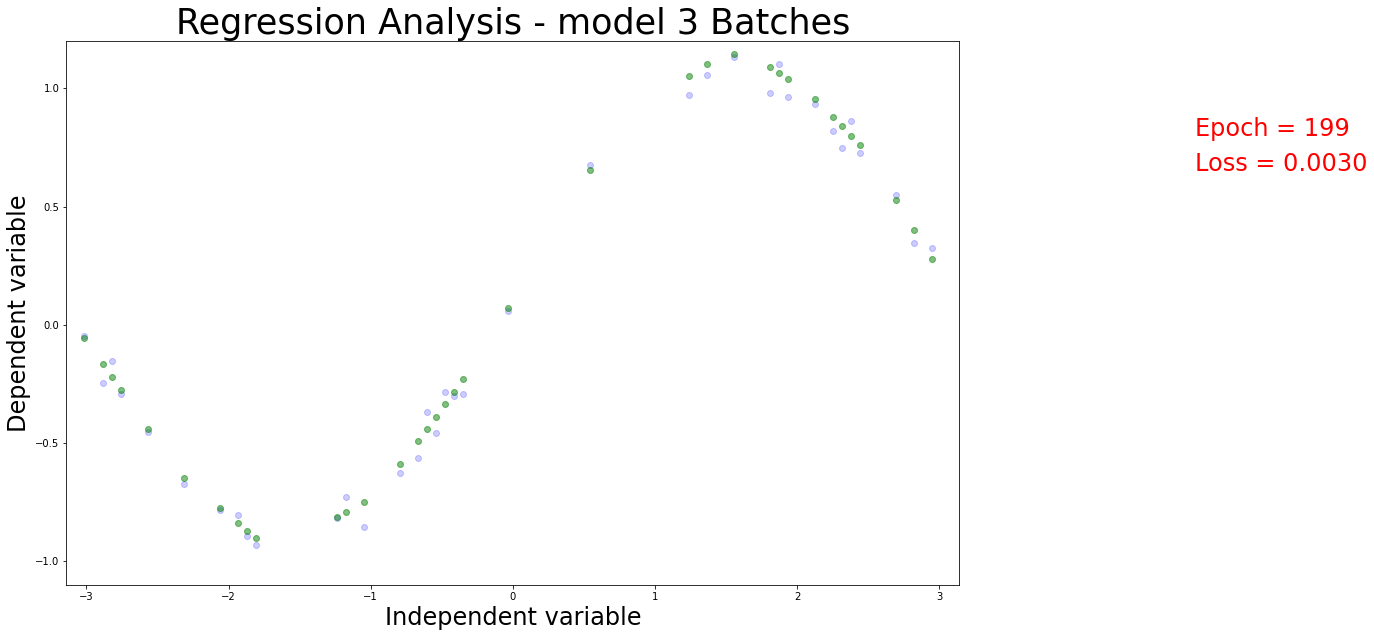

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-3.14, 3.14, 100), dim=1)  # x data (tensor)
y = torch.sin(x) + 0.2*torch.rand(x.size())             # noisy y data (tensor)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)


# another way to define a network
net = torch.nn.Sequential(#Each layer will be run in this order
        torch.nn.Linear(1, 200),#Applies a linear transformation to the income data, input size:1,  output size:200
        torch.nn.LeakyReLU(),#Applies the element-wise fuction. The parameter has the default value of 1e-2
        torch.nn.Linear(200, 100),# input size:200,  output size:100
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),# input size:100,  output size:1
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)#This uses the Adaptive Moment estimation to optimize the machine learing model to better predict the correct out put
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(#it is a data loader
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, #how many samples pere batch to load through the model.
    shuffle=True, num_workers=2,)#shuffles the data so that the model does not recognize unwanted patterns.


my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-3.14, 3.14)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(4.8, 0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(4.8, 0.65, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})
